In [1]:
# import the packages we need to investigate the data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from calendar import monthrange
import matplotlib.dates as mdates
import scipy.stats as st
import requests
from meteostat import Point, Daily

Import the data from train.csv

In [114]:
# Read the CSV file into a DataFrame
df = pd.read_csv('train.csv')

print(df.head())  # Display the first few rows of the DataFrame



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [115]:
df.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [116]:
df.min()

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
dtype: object

In [117]:
# separate the dataframe by the death and survival
death_df = df[df["Survived"]== 0]
live_df = df[df["Survived"]== 1]
death_total = len(death_df)
live_total = len(live_df)


Text(0, 0.5, 'Number')

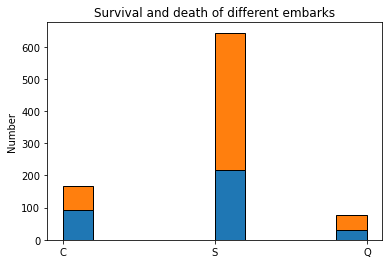

In [118]:


# Plot the stacked histogram grouped by embark 
filtered_live_df = live_df.dropna(subset=['Embarked'])
filtered_death_df = death_df.dropna(subset=['Embarked'])
plt.hist([filtered_live_df['Embarked'], filtered_death_df['Embarked']],  stacked=True, density=False, edgecolor='black')

# Customize the plot
plt.title('Survival and death of different embarks')
plt.ylabel('Number')




Text(0, 0.5, 'Number')

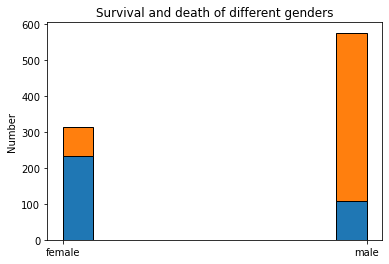

In [119]:
# Plot the stacked histogram grouped by gender 

plt.hist([live_df['Sex'], death_df['Sex']], stacked=True, density=False, edgecolor='black')
# Customize the plot
plt.title('Survival and death of different genders')
plt.ylabel('Number')


([<matplotlib.axis.XTick at 0x7ff2c7537d00>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

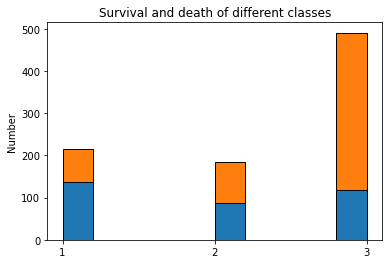

In [120]:
# Plot the stacked histogram grouped by gender 

plt.hist([live_df['Pclass'], death_df['Pclass']],stacked=True, density=False, edgecolor='black')
# Customize the plot
plt.title('Survival and death of different classes')
plt.ylabel('Number')

plt.xticks(range(1,4), ['1','2','3'])

We use scatterplot to investigate the relationship between passengerID and survival rate

In [121]:

# Create the scatter plot
live_df['PassengerId'].mean()
death_df['PassengerId'].mean()
df['PassengerId'].mean()


446.0

The mean value of passengerID of survivied is 444, and the mean value of passengerID of dead is 447.

The mean value of passengerID of total passengers is 446.

So it can be concluded that the ID has little impact on the survival rate.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

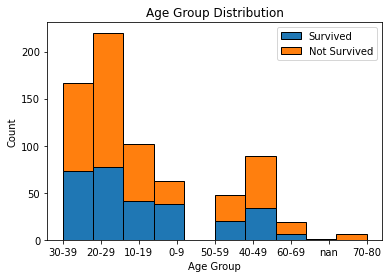

In [122]:
# Remove the blank age
filtered_live_df = live_df.dropna(subset=['Age'])
filtered_death_df = death_df.dropna(subset=['Age'])

# Define the age segments
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Specify the age group boundaries
labels = ['0-9','10-19', '20-29', '30-39','40-49','50-59','60-69','70-80']  # Labels for the age groups

# Segment people by age
filtered_live_df['Age Group'] = pd.cut(filtered_live_df['Age'], bins=bins, labels=labels, right=False)
filtered_death_df['Age Group'] = pd.cut(filtered_death_df['Age'], bins=bins, labels=labels, right=False)

filtered_live_df['Age Group'] = filtered_live_df['Age Group'].astype(str)
filtered_death_df['Age Group'] = filtered_death_df['Age Group'].astype(str)

plt.hist([filtered_live_df['Age Group'], filtered_death_df['Age Group']],stacked=True, density=False, edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.legend(['Survived', 'Not Survived'])
plt.show()

ConversionError: Failed to convert value(s) to axis units: ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

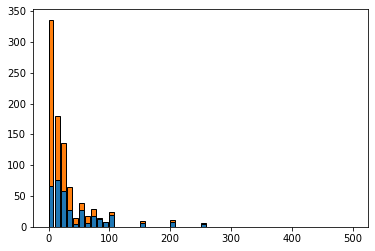

In [161]:
# Remove the blank age
filtered_live_df = live_df.dropna(subset=['Fare'])
filtered_death_df = death_df.dropna(subset=['Fare'])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']


plt.hist([filtered_live_df['Fare'], filtered_death_df['Fare']],bins = bins, stacked=True, density=False, width = 8, edgecolor='black')
plt.xticks(labels)
plt.xlabel('Fare Group')
plt.ylabel('Count')
plt.title('Fare Group Distribution')
plt.legend(['Survived', 'Not Survived'])
plt.show()

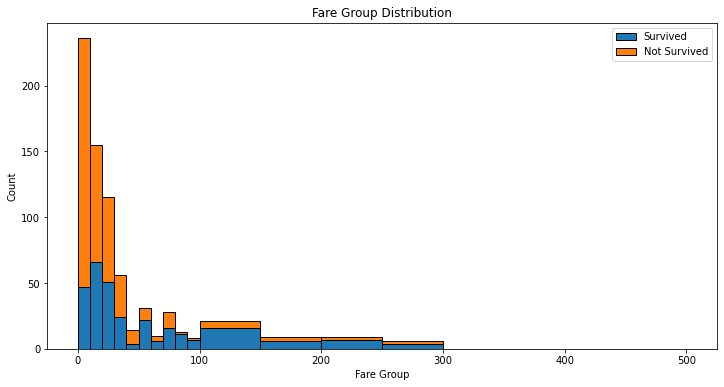

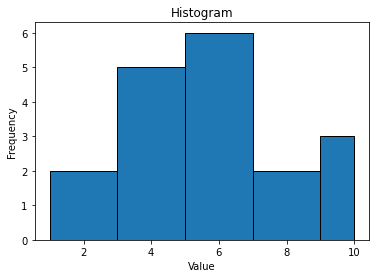

In [148]:
import matplotlib.pyplot as plt

# Sample data
data = [1, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 7, 8, 9, 9, 10]

# Define bin edges and labels
bin_edges = [1, 3, 5, 7, 9, 10]  # Example bin edges
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']  # Example bin labels

# Plot the histogram with custom bin labels
plt.hist(data, bins=bin_edges, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()

